In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
train_url = 'https://raw.githubusercontent.com/chanstouch/2022-ml-curriculum/main/data/titanic/train.csv'
train = pd.read_csv(train_url)
train['souce'] = 'train'

df = train
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,souce
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [3]:
test_url = 'https://raw.githubusercontent.com/chanstouch/2022-ml-curriculum/main/data/titanic/test.csv'
test = pd.read_csv(test_url)
test['souce'] = 'test'

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,souce
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,test
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,test
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,test
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,test
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,test


In [4]:
# dtype
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  souce        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
souce            0
dtype: int64

<AxesSubplot: >

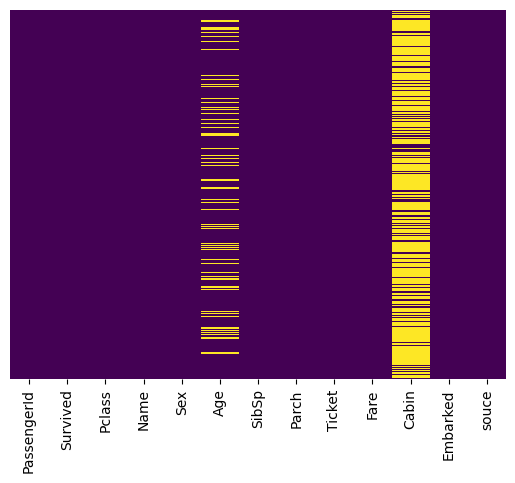

In [6]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
combined = [train, test]

for data in combined:
    data['prefix'] = data.Name.str.extract(r'([A-Za-z]+)\.', expand=False)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,souce,prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,Mr


In [9]:
Prefix_mapping = {"Mr":0,"Miss":1,"Mrs":2,"Master":0,"Dr":3,"Rev":3,
                  "Major":3,"Mlle":1,"Col":3,"Capt":0,"Sir":0,"Ms":1,
                  "Lady":1,"Mme":3,"Countess":3,"Jonkheer":3,"Don":3}

for data in combined:
    data['prefix'] = data['prefix'].map(Prefix_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,souce,prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,0


In [10]:
# train[['Pclass', 'Survived']].groupby
train.groupby('Pclass', as_index=False)['Survived'].mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


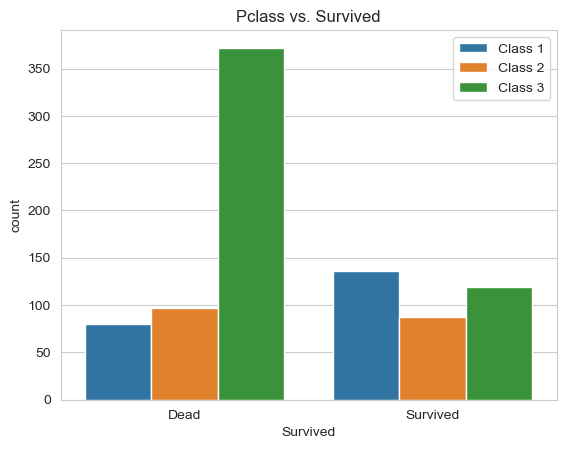

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train)
plt.xticks([0, 1], ['Dead', 'Survived'])
plt.legend(['Class 1', 'Class 2', 'Class 3'])
plt.title('Pclass vs. Survived')
plt.show()

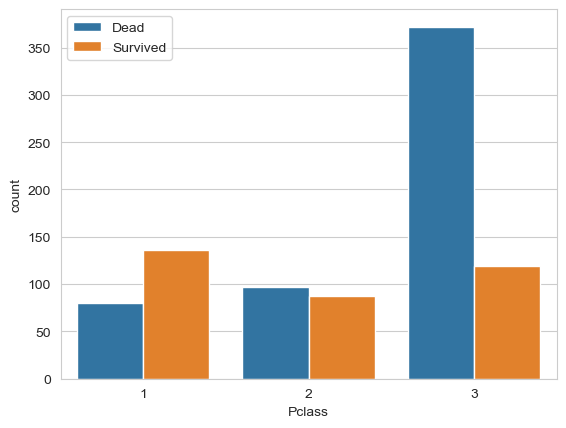

In [14]:
ax = sns.countplot(x='Pclass', hue='Survived', data=train)
ax.legend(['Dead', 'Survived'])
plt.show()

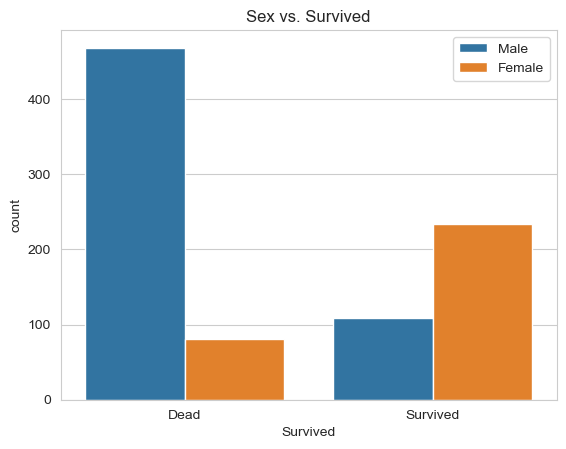

In [15]:
sns.countplot(x='Survived', hue='Sex', data=train)
plt.xticks([0, 1], ['Dead', 'Survived'])
plt.legend(['Male', 'Female'])
plt.title('Sex vs. Survived')
plt.show()

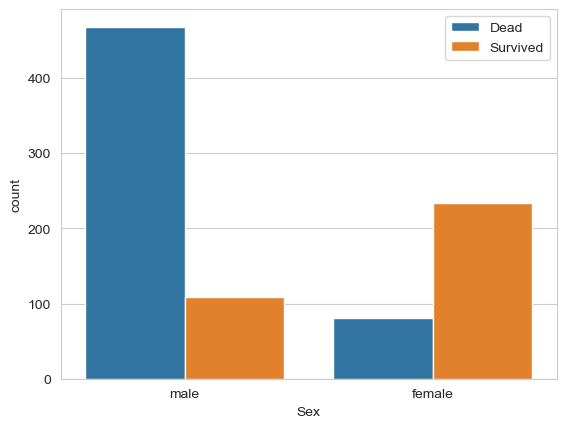

In [16]:
ax = sns.countplot(x='Sex', hue='Survived', data=train)
ax.legend(['Dead', 'Survived'])
plt.show()

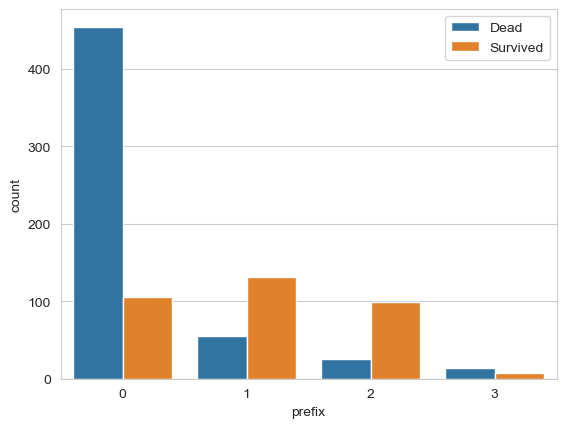

In [17]:
ax = sns.countplot(x='prefix', hue='Survived', data=train)
ax.legend(['Dead', 'Survived'])
plt.show()

In [19]:
train.groupby('SibSp', as_index=False)['Survived'].mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


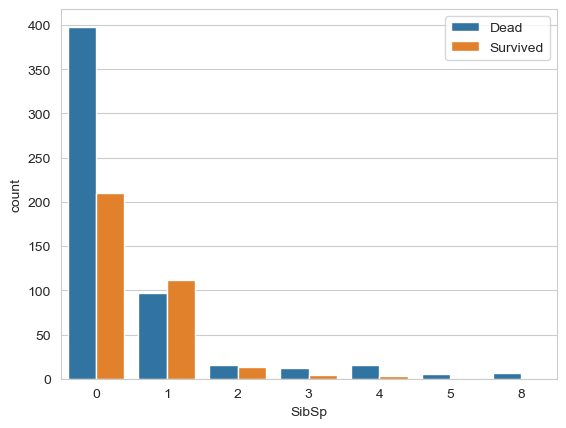

In [20]:
sns.countplot(x='SibSp', hue='Survived', data=train)
plt.legend(['Dead', 'Survived'])
plt.show()

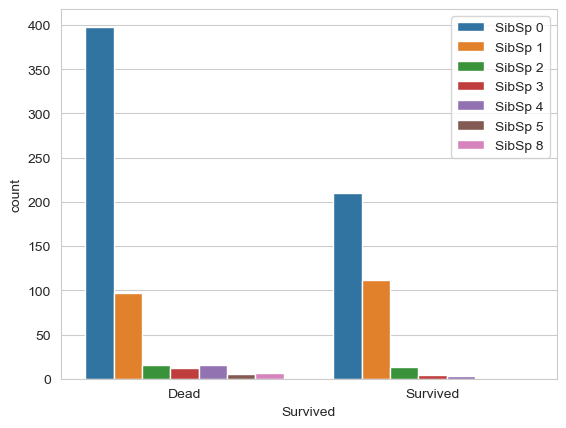

In [24]:
sns.countplot(x='Survived', hue='SibSp', data=train)
plt.xticks([0, 1], ['Dead', 'Survived'])
plt.legend(['SibSp 0', 'SibSp 1', 'SibSp 2', 'SibSp 3', 'SibSp 4', 'SibSp 5', 'SibSp 8'])
plt.show()

In [25]:
train.groupby('Parch', as_index=False)['Survived'].mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


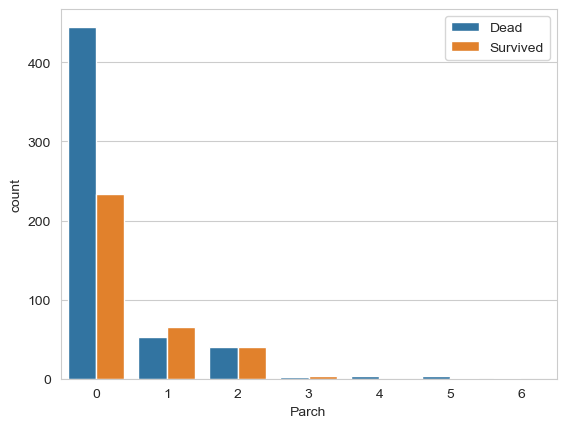

In [27]:
sns.countplot(x='Parch', hue='Survived', data=train)
plt.legend(['Dead', 'Survived'])
plt.show()

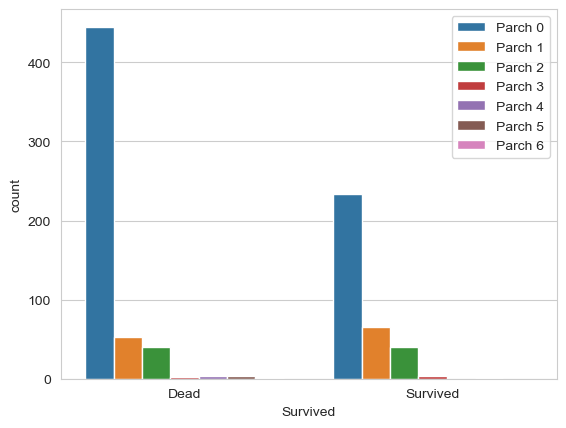

In [28]:
sns.countplot(x='Survived', hue='Parch', data=train)
plt.xticks([0, 1], ['Dead', 'Survived'])
plt.legend(['Parch 0', 'Parch 1', 'Parch 2', 'Parch 3', 'Parch 4', 'Parch 5', 'Parch 6'])
plt.show()

In [29]:
train['family'] = train['SibSp'] + train['Parch']
test['family'] = test['SibSp'] + test['Parch']
train['family'].value_counts()

family
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

In [30]:
train.groupby('family', as_index=False)['Survived'].mean().sort_values(by='Survived', ascending=False)

,family,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


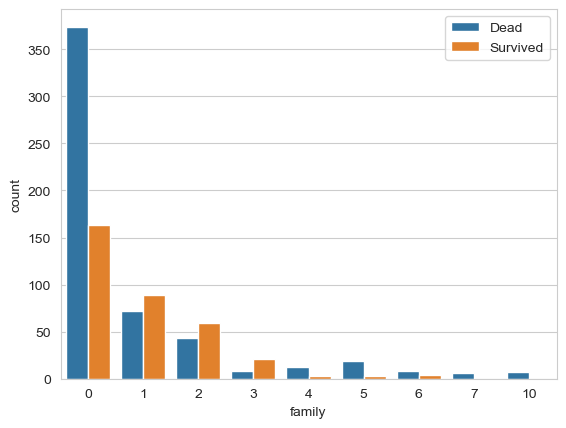

In [32]:
sns.countplot(x='family', hue='Survived', data=train)
plt.legend(['Dead', 'Survived'])
plt.show()

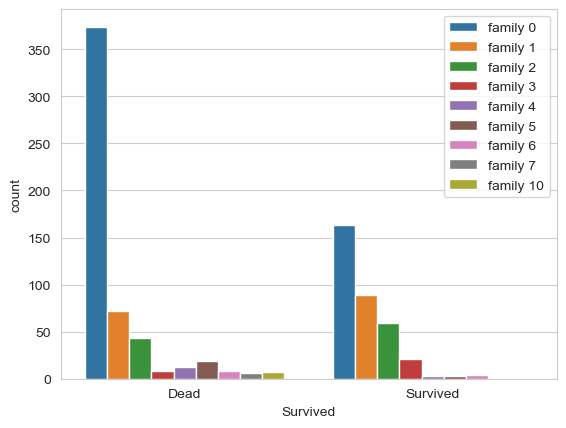

In [33]:
sns.countplot(x='Survived', hue='family', data=train)
plt.xticks([0, 1], ['Dead', 'Survived'])
plt.legend(['family 0', 'family 1', 'family 2', 'family 3', 'family 4', 'family 5', 'family 6', 'family 7', 'family 10'])
plt.show()

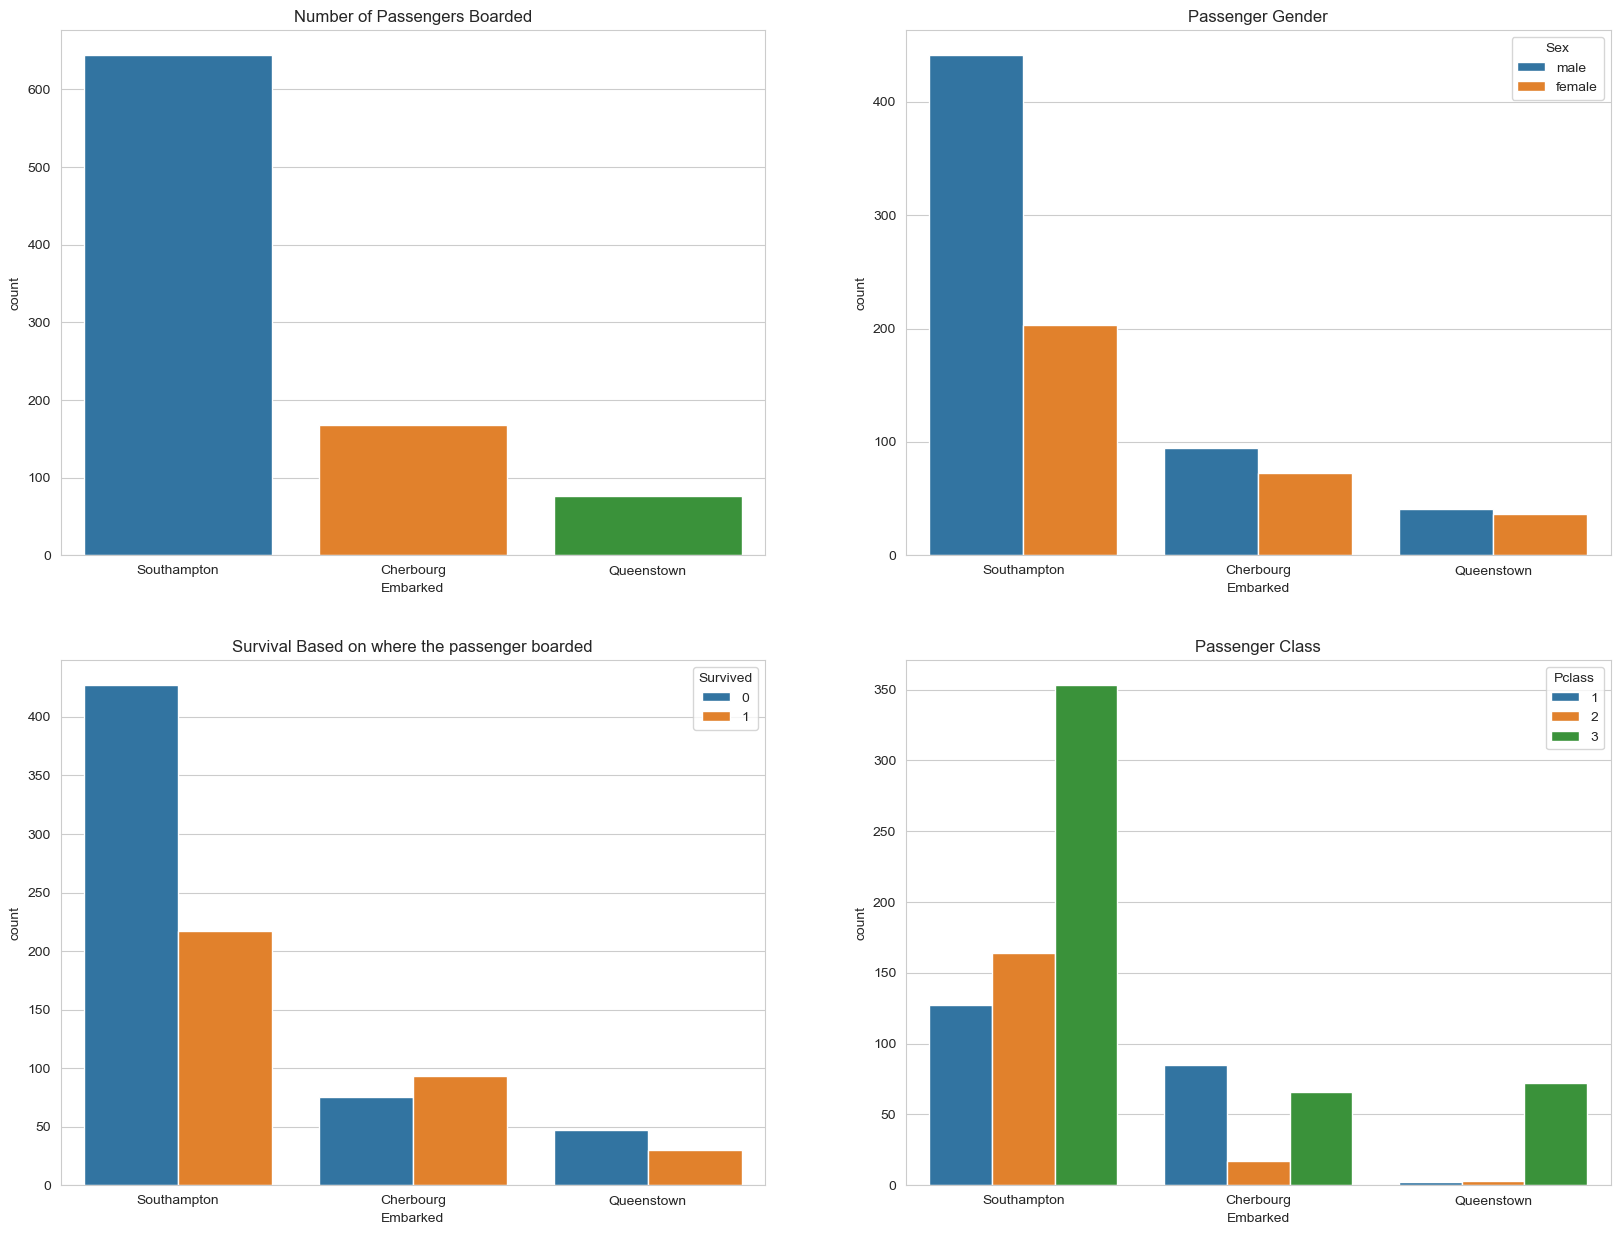

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot(x='Embarked', data=train, ax=ax[0, 0])
ax[0, 0].set_title('Number of Passengers Boarded')
ax[0, 0].set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'])

sns.countplot(x='Embarked', hue='Sex', data=train, ax=ax[0, 1])
ax[0, 1].set_title('Passenger Gender')
ax[0, 1].set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'])

sns.countplot(x='Embarked', hue='Survived', data=train, ax=ax[1, 0])
ax[1, 0].set_title('Survival Based on where the passenger boarded')
ax[1, 0].set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'])

sns.countplot(x='Embarked', hue='Pclass', data=train, ax=ax[1, 1])
ax[1, 1].set_title('Passenger Class')
ax[1, 1].set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'])

plt.show()

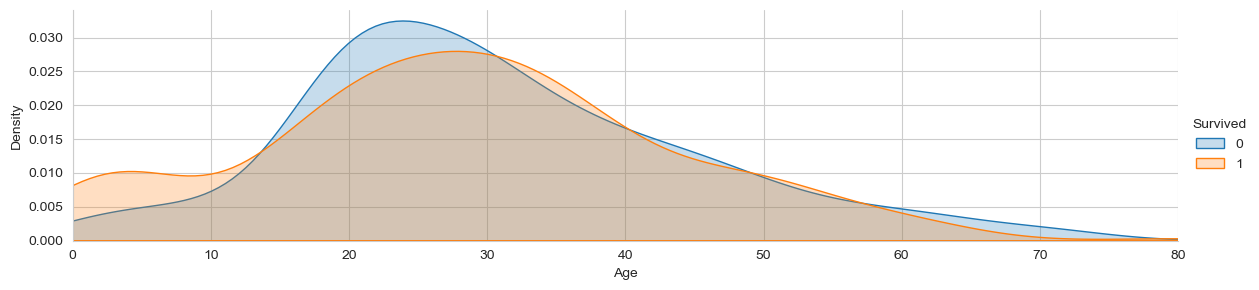

In [36]:
fac = sns.FacetGrid(train, hue='Survived', aspect=4)
fac.map(sns.kdeplot, 'Age', shade=True)
fac.set(xlim=(0, train['Age'].max()))
fac.add_legend()
plt.show()

In [37]:
train.drop('Ticket', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)

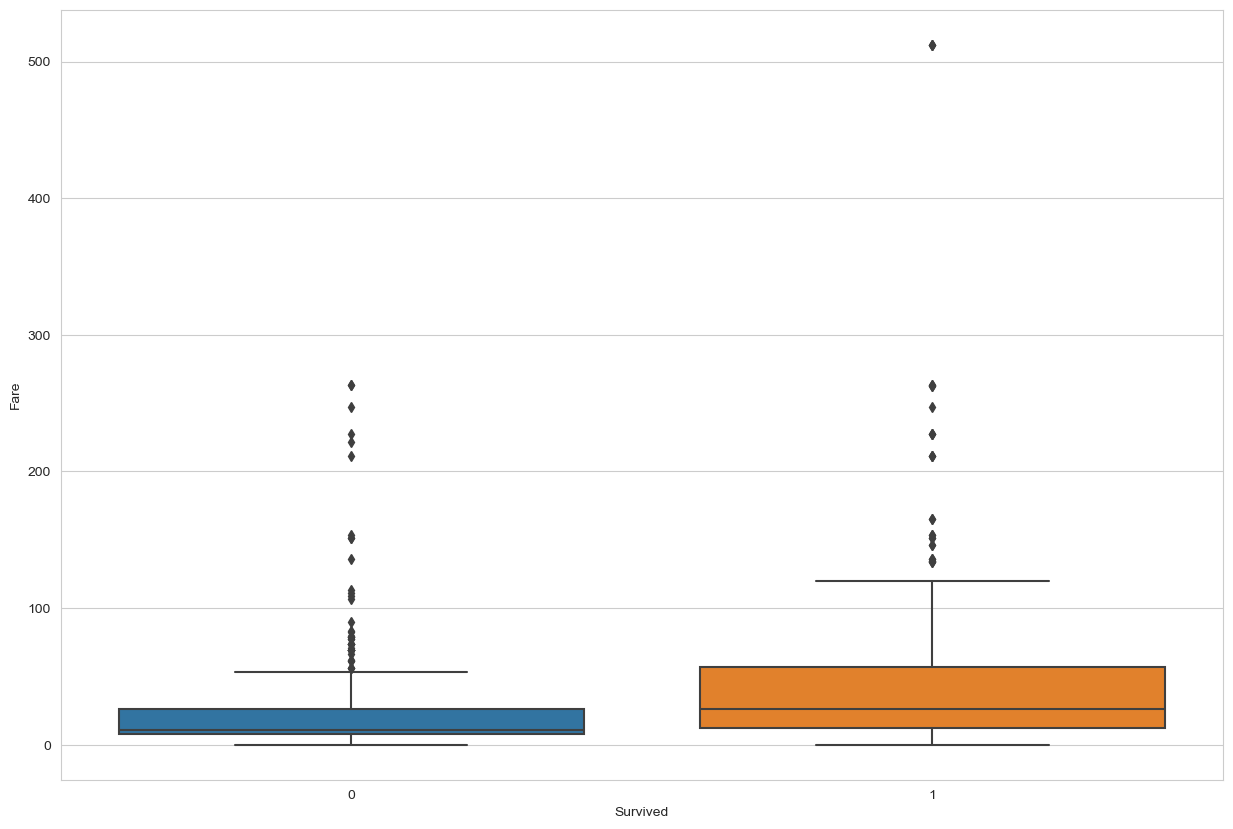

In [40]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Survived', y='Fare', data=train)
plt.show()

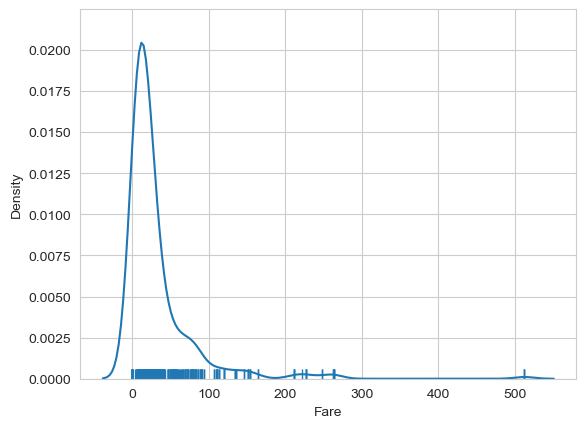

In [55]:
sns.distplot(train['Fare'], hist=False, rug=True)
plt.show()

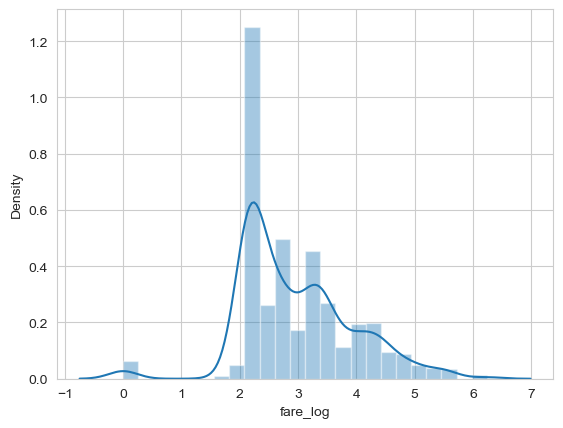

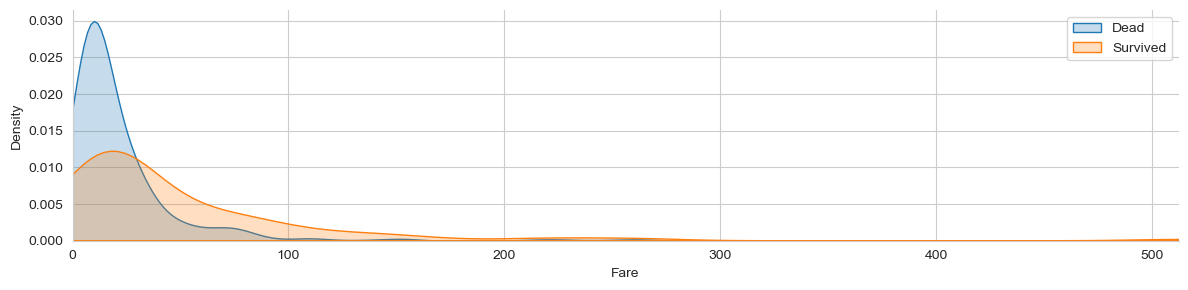

In [58]:
sns.distplot(train['fare_log'])
fac = sns.FacetGrid(train, hue='Survived', aspect=4)
fac.map(sns.kdeplot, 'Fare', shade=True)
fac.set(xlim=(0, train['Fare'].max()))
plt.legend(['Dead', 'Survived'])
plt.show()